In [1]:
setwd('/data/import/project1//momo-6.12.0.199///runtime/PIPELINE/taxonkit1/a.fel//BJTC-204')

In [2]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
load('jiaocha.rda')

In [4]:
load('./exp4.rda')

In [5]:
dim(exp4)

[1]   251 11882

In [7]:
exp4 = exp4 %>%  dplyr::filter(Gender == 'M')

In [8]:
colnames(exp4) = gsub('-','.',colnames(exp4))

In [12]:
male.gene = read.csv('diffgene2.csv',row.names = 1)

In [13]:
male.gene = male.gene %>% dplyr::filter(change != 'NOT') %>% rownames()

In [14]:
expr = exp4[,male.gene]

In [16]:
head(expr)

,SYT5,ATP10B,PRSS3,FBXL2,PHKG1,SYP,PTPRN,PTMS,DAAM2,NELL1,...,PIN1,TUSC3,SSBP3,TUBB4,RBP4,SEPP1,EFEMP1,DYNC1I1,GABRD,ENO2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431721,6.072172,8.180086,7.752138,9.077388,6.755411,7.342586,7.146758,5.443910,7.504072,8.125692,...,7.854175,8.290631,10.414346,8.866506,6.985588,8.719438,6.108822,8.938026,7.918141,9.875480
GSM2431726,5.932612,8.010908,7.969423,8.329847,7.217372,6.781492,6.703327,6.644667,9.109535,6.429658,...,6.526439,6.774439,10.754375,8.955523,6.132049,10.452414,7.132595,6.870775,7.065275,8.771113
GSM2431727,7.118367,7.752621,7.868202,8.822679,6.696205,8.619993,7.785840,7.567475,9.767533,8.326566,...,8.108739,8.840250,10.292301,10.842200,7.504695,9.870438,6.823899,9.667712,8.916391,11.196003
GSM2431728,6.871340,8.035140,8.225899,9.494264,6.601586,8.264629,8.008771,7.283869,8.659156,8.480912,...,8.366098,8.989155,10.627328,10.160211,7.487244,9.373322,6.028617,10.133312,8.666038,11.189176
GSM2431731,5.745391,8.374348,7.462840,8.914534,7.290843,7.292795,6.873819,5.386840,8.522407,7.902626,...,8.011993,8.374939,9.279633,8.999374,7.338462,10.779470,7.252412,9.450110,7.379146,10.373573
GSM2431734,6.502885,7.866380,7.667150,8.943164,6.688234,8.300522,7.633397,7.351038,9.376408,6.866118,...,7.966432,7.435354,10.323017,11.078138,7.565677,9.674459,8.738763,9.255374,8.008541,10.932148


In [17]:
type = exp4$TYPE

In [18]:
type = ifelse(type == 'MDD',1,0)

In [19]:
y = type

In [20]:
colnames(expr) = gsub('-','.',colnames(expr))

In [21]:
expr <- expr[, !grepl("^\\d+", names(expr))]

In [22]:
library(dplyr)

In [23]:
x = as.matrix(expr)
y = y

In [24]:
library(randomForest)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




In [25]:
options(repr.plot.width = 5,repr.plot.height = 5)

png 
  2

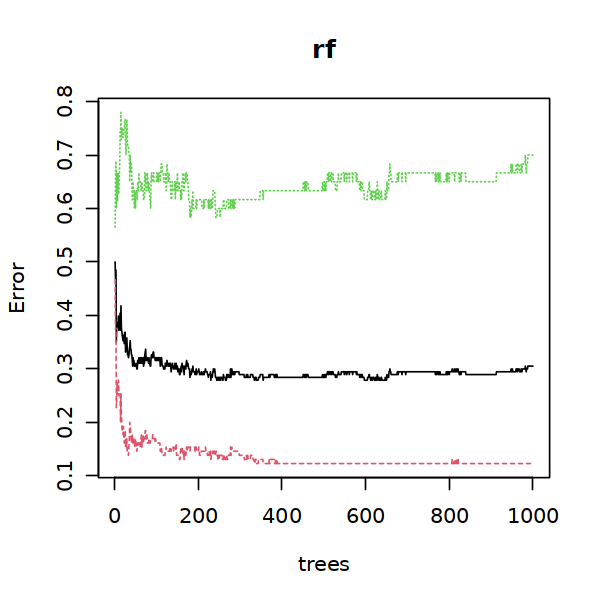

In [26]:
set.seed(100)
rf = randomForest(as.factor(y)~.,data = x,ntree =1000,important=TRUE,proximity=TRUE)
plot(rf)
pdf('./figure2//res2/fig2.forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

In [27]:
library(tidyr)
library(ggplot2)


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin




In [28]:
options(repr.plot.width = 6,repr.plot.height = 5)

In [29]:
fit.rf = rf
# 提取树与OOB的关系的数值
err_rates <-fit.rf[["err.rate"]]
err_rates%>%
  as.data.frame()%>%
  mutate(Tree=1:1000)->err_rates
err_rates%>%
  pivot_longer(cols = 1:3,
               names_to = "OOB",
               values_to = "value")->err_rates

p3<-ggplot(err_rates, aes(x=Tree, y=value,color=OOB)) +
  geom_line(size=1) +
  labs(title = "The relationship between tree number and OOB",
       x="Number of Trees", y="Error Rate") +
  scale_color_brewer(palette = "Set2",
                     name="Error rate",
                     label=c("MDD","Control","OOB"))+
  theme_bw()

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


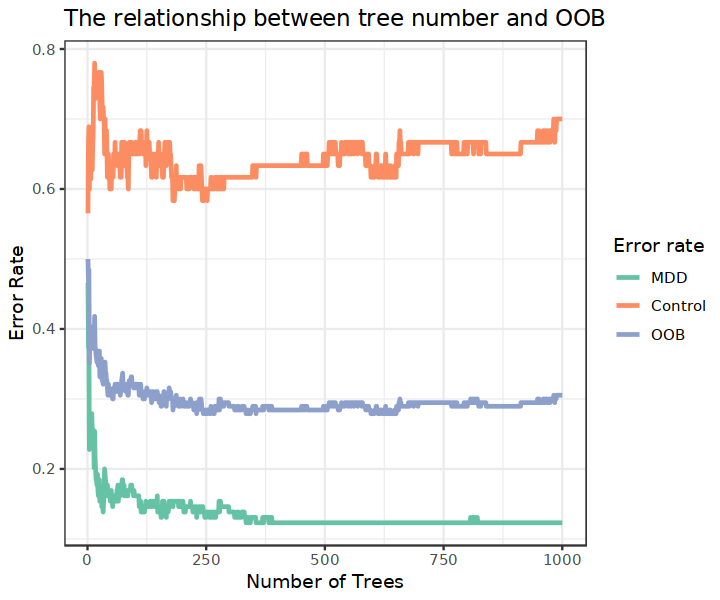

In [30]:
p3
ggsave('./figure2//res2/fig2.forest.pdf',height = 6,width = 6)

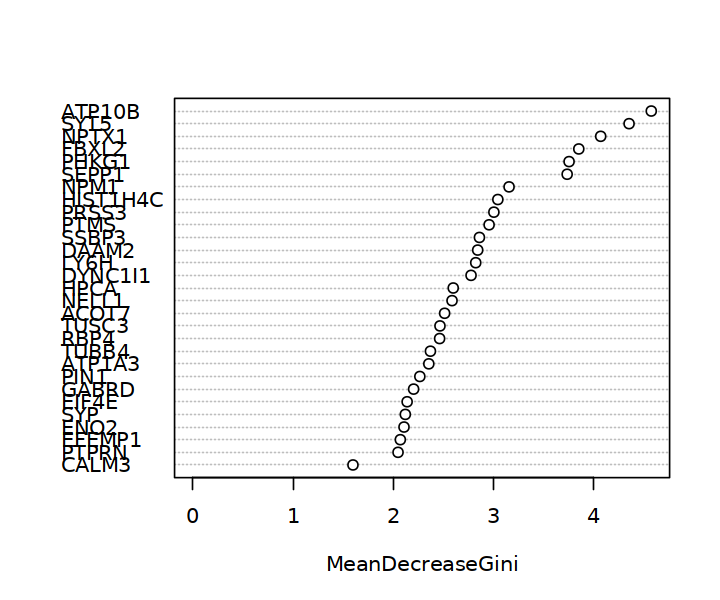

In [31]:
trees = which.min(rf$err.rate[,1])
rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)  # 
importance = importance(rf)
varImpPlot(rf,main = '')

In [32]:
pdf('./figure2/res2/fig3.forest2.pdf',height = 6,width = 4)
trees = which.min(rf$err.rate[,1])
rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)  # 
importance = importance(rf)
varImpPlot(rf,main = '')
dev.off()

png 
  2

png 
  2

ATP10B     SYT5    NPTX1    FBXL2    PHKG1    SEPP1     NPM1 HIST1H4C 
4.573455 4.351994 4.068872 3.850255 3.753370 3.734221 3.154575 3.042609 
   PRSS3     PTMS    SSBP3    DAAM2     LY6H  DYNC1I1     HPCA    NELL1 
3.003050 2.955449 2.858859 2.841593 2.821994 2.775311 2.597506 2.585627 
   ACOT7    TUSC3     RBP4    TUBB4   ATP1A3     PIN1    GABRD    EIF4E 
2.511707 2.465219 2.461653 2.370029 2.353821 2.264304 2.202182 2.137539 
     SYP     ENO2   EFEMP1    PTPRN    CALM3 
2.119418 2.106431 2.069687 2.046768 1.597008

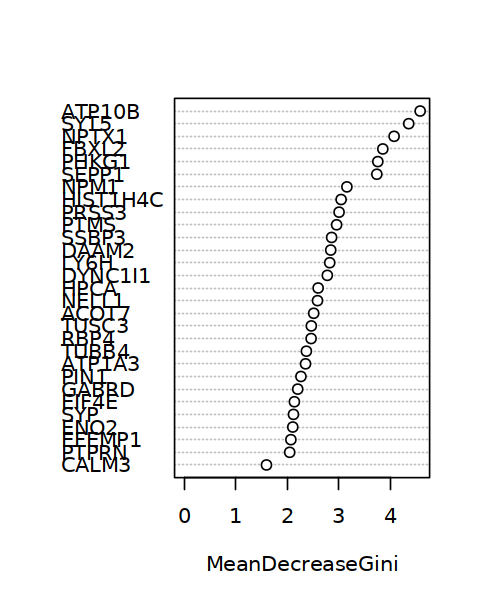

In [28]:

pdf('./figure2/res2/fig3.forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()
options(repr.plot.width = 4)
varImpPlot(rf,main = '')
rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] 
rfGenes

In [29]:
fit.rf = rf
rf.imp <- importance(fit.rf)%>%as.data.frame()

In [30]:
library(ggplot2)
library(viridis)

Warning message:
"package 'viridis' was built under R version 4.2.3"
Loading required package: viridisLite

Warning message:
"package 'viridisLite' was built under R version 4.2.3"


In [31]:

rf.imp%>%
  mutate(Variable=rownames(rf.imp))%>%
  arrange(desc(MeanDecreaseGini))->rf.imp
top_vars<-rf.imp[1:20,]
p2<-ggplot(top_vars, aes(y = reorder(Variable,-MeanDecreaseGini), x =MeanDecreaseGini)) +
  geom_bar(stat = "identity", fill = "#69b3a2",alpha=0.8,width = 0.6) +
  scale_fill_viridis() +
  labs(title = "Variable Importance Plot of RF",
       x = "Importance Score",
       y = "") +
  coord_flip()+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 30,hjust =0.9))

In [32]:
options(repr.plot.width = 6,repr.plot.height = 5)

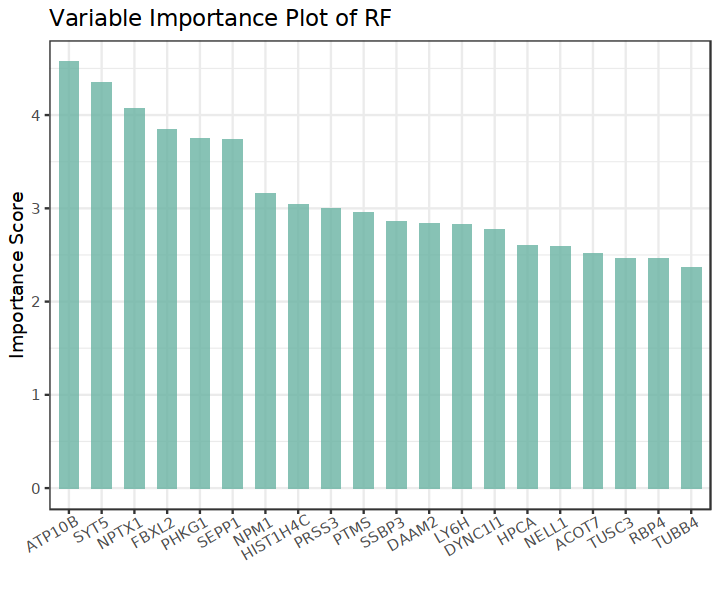

In [33]:
p2
ggsave('./figure2/res2/fig3.forest2.pdf',height = 5,width = 6)

In [34]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 4.2.3"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 4.2.3"

Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-8



In [35]:
fit = glmnet(x, y, family = "binomial", alpha = 1, lambda = NULL)

In [36]:
cvfit = cv.glmnet(x, y,nfold=10,family = "binomial", type.measure = "class")

In [37]:
x1 <- coef(fit) 
tmp <- as.data.frame(as.matrix(x1)) 
tmp$coef <- row.names(tmp) 
tmp <- reshape::melt(tmp, id = "coef") 
tmp$variable <- as.numeric(gsub("s", "", tmp$variable)) 
tmp$coef <- gsub('_','-',tmp$coef) 
tmp$lambda <- fit$lambda[tmp$variable+1] 
tmp$norm <- apply(abs(x[-1,]), 2, sum)[tmp$variable+1] 
head(tmp)

,coef,variable,value,lambda,norm
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),0,-0.7731899,0.1235503,1267.159
2,SYT5,0,0.0000000,0.1235503,1267.159
3,ATP10B,0,0.0000000,0.1235503,1267.159
4,PRSS3,0,0.0000000,0.1235503,1267.159
5,FBXL2,0,0.0000000,0.1235503,1267.159
6,PHKG1,0,0.0000000,0.1235503,1267.159


In [38]:
library(ggplot2)
library(ggsci)
library(glmnet)

Warning message:
"package 'ggsci' was built under R version 4.2.3"


In [39]:
options(repr.plot.width = 10)

Warning message:
"This manual palette can handle a maximum of 9 values. You have supplied 10"
Warning message:
"This manual palette can handle a maximum of 7 values. You have supplied 10"


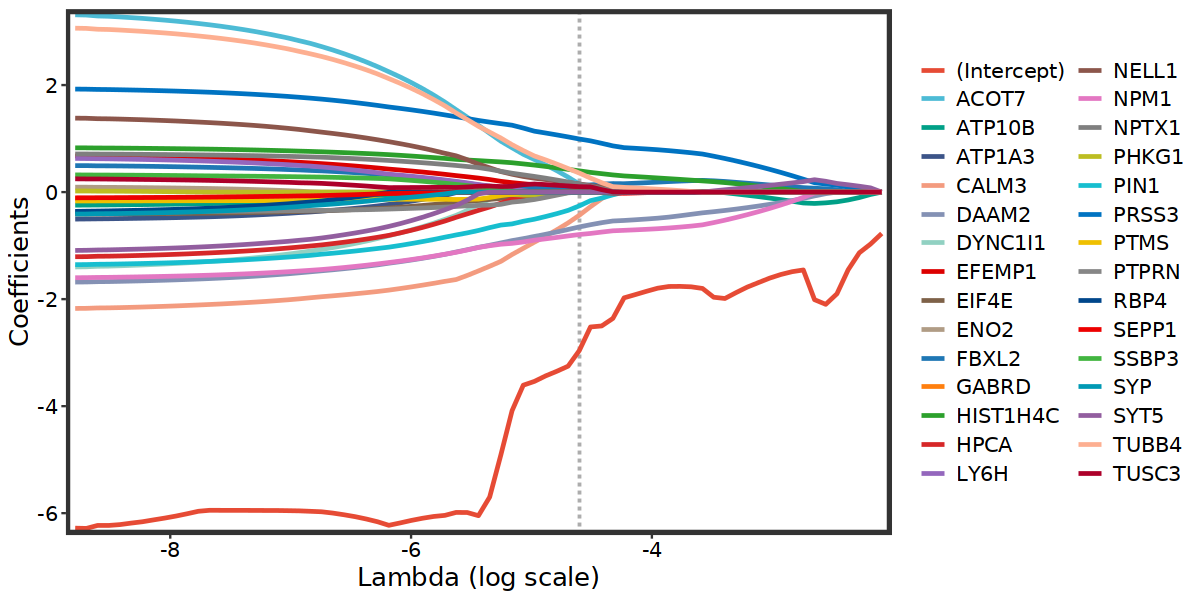

In [40]:
ggplot(tmp,aes(log(lambda),value,color = coef)) + 
  geom_vline(xintercept = log(cvfit$lambda.min),
             size=0.8,color='grey60',
             alpha=0.8,linetype=2)+
  geom_line(size=1) + 
  xlab("Lambda (log scale)") + 
  ylab('Coefficients')+ 
  theme_bw(base_rect_size = 2)+ 
  scale_color_manual(values= c(pal_npg()(10),
                               pal_d3()(10),
                               pal_jco()(3),
                               pal_lancet()(10),
                               pal_aaas()(10),
                               pal_simpsons()(10),
                               pal_gsea()(10),
                               pal_jama()(10)))+ 
  scale_x_continuous(expand = c(0.01,0.01))+ 
  scale_y_continuous(expand = c(0.01,0.01))+ 
  theme(panel.grid = element_blank(), 
        axis.title = element_text(size=15,color='black'), 
        axis.text = element_text(size=12,color='black'), 
        legend.title = element_blank(), 
        legend.text = element_text(size=12,color='black'), 
        legend.position = 'right')+ 
  # annotate('text',x = -3.3,y=0.26,
  #          label='Optimal Lambda = 0.0351',
  #          color='black')+ 
  guides(col=guide_legend(ncol = 2))

In [41]:
xx <- data.frame(lambda=cvfit[["lambda"]],
                 cvm=cvfit[["cvm"]],
                 cvsd=cvfit[["cvsd"]], 
                 cvup=cvfit[["cvup"]],
                 cvlo=cvfit[["cvlo"]],
                 nozezo=cvfit[["nzero"]]) 
xx$ll<- log(xx$lambda) 
xx$NZERO<- paste0(xx$nozezo,' vars')

Warning message:
"This manual palette can handle a maximum of 9 values. You have supplied 10"


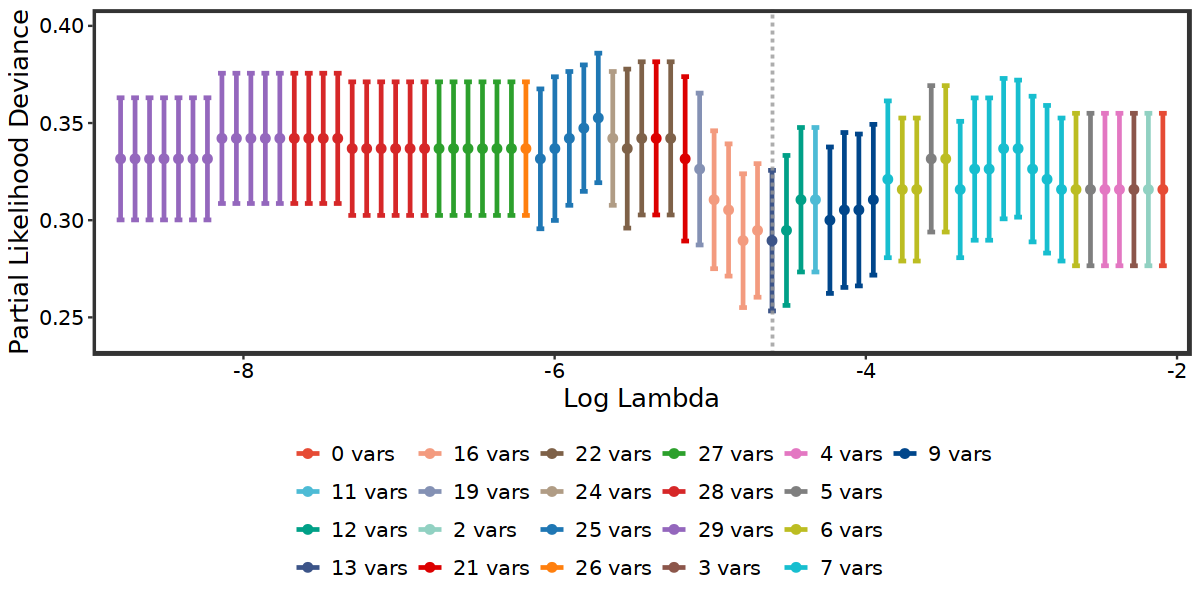

In [42]:
ggplot(xx,aes(ll,cvm,color=NZERO))+ 
  geom_errorbar(aes(x=ll,ymin=cvlo,ymax=cvup),
                width=0.05,size=1)+ 
  geom_vline(xintercept = xx$ll[which.min(xx$cvm)],
             size=0.8,color='grey60',alpha=0.8,
             linetype=2)+ 
  geom_point(size=2)+ 
  xlab("Log Lambda")+
  ylab('Partial Likelihood Deviance')+ 
  theme_bw(base_rect_size = 1.5)+ 
  scale_color_manual(values= c(pal_npg()(10),
                               pal_d3()(10),
                               pal_lancet()(10),
                               pal_aaas()(10)))+ 
  scale_x_continuous(expand = c(0.02,0.02))+ 
  scale_y_continuous(expand = c(0.02,0.02))+ 
  theme(panel.grid = element_blank(), 
        axis.title = element_text(size=15,
                                  color='black'), 
        axis.text = element_text(size=12,
                                 color='black'), 
        legend.title = element_blank(), 
        legend.text = element_text(size=12,
                                   color='black'), 
        legend.position = 'bottom')+ 
  # annotate('text',x= -5.3,y=12.4,
  #          label='Optimal Lambda = 0.0351',
  #          color='black')+ 
  guides(col=guide_legend(ncol = 6))


In [43]:
options(repr.plot.width = 4,repr.plot.height = 5)

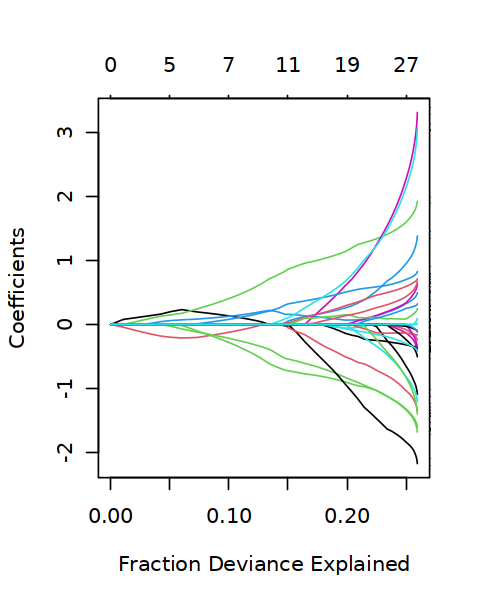

In [44]:
plot(fit, xvar = "dev", label = TRUE)

In [45]:
pdf("./figure2/res2/1A_lasso.pdf", width = 4, height = 4.5)
plot(fit, xvar = "dev", label = TRUE)
dev.off()

png 
  2

In [46]:
pdf("./figure2//res2/2cvfit.pdf")
plot(cvfit)
dev.off()

png 
  2

In [47]:
cvfit$lambda.min
myCoefs <- coef(cvfit, s="lambda.min")
lasso_fea <- myCoefs@Dimnames[[1]][which(myCoefs != 0 )]
(lasso_fea <- lasso_fea[-1])

[1] 0.01002155

[1] "PRSS3"    "FBXL2"    "DAAM2"    "NELL1"    "ACOT7"    "NPTX1"   
 [7] "NPM1"     "HIST1H4C" "CALM3"    "PIN1"     "TUSC3"    "TUBB4"   
[13] "EFEMP1"

In [48]:
set.seed(1234)
expr3 = cbind(y,x) %>%  as.data.frame()
colnames(expr3)[1] = 'Group'
expr4 = expr3 
dim(expr4)
model.gene = colnames(expr4)[2:dim(expr4)[2]]
library(caret)
library(ggplot2)
a = c()
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 
         #percent=TRUE, # 
         smooth=FALSE,# 
         levels=c(0,1),direction="<" #
         )
    if (res$auc > 0.6){
        a = append(a,i)
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0('./figure2/res2/',i,'.ROC.pdf'))
}else{
        
}

    
    }

[1] 190  30

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"


[1] "SYT5 0.664102564102564"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PRSS3 0.66525641025641"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "FBXL2 0.684615384615385"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SYP 0.641794871794872"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PTPRN 0.649871794871795"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PTMS 0.638974358974359"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "NELL1 0.643589743589744"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "HPCA 0.630384615384615"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ACOT7 0.643333333333333"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ATP1A3 0.65025641025641"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "NPTX1 0.628205128205128"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "HIST1H4C 0.606153846153846"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "LY6H 0.620384615384615"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "CALM3 0.621025641025641"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TUSC3 0.614487179487179"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TUBB4 0.623076923076923"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "DYNC1I1 0.639615384615385"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "GABRD 0.608205128205128"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ENO2 0.623076923076923"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


In [50]:
rfgene = names(rfGenes)[1:20]

In [51]:
lasso_fea

[1] "PRSS3"    "FBXL2"    "DAAM2"    "NELL1"    "ACOT7"    "NPTX1"   
 [7] "NPM1"     "HIST1H4C" "CALM3"    "PIN1"     "TUSC3"    "TUBB4"   
[13] "EFEMP1"

In [52]:
gene = intersect(rfgene,intersect(a,lasso_fea))

In [53]:
gene

[1] "NPTX1"    "FBXL2"    "HIST1H4C" "PRSS3"    "NELL1"    "ACOT7"    "TUSC3"   
[8] "TUBB4"

In [54]:
library(RColorBrewer)
library(VennDiagram)
p = venn.diagram(
  x = list(rfgene, lasso_fea,a),
  category.names = c("RF.gene" , "lasso.gene","AUC" ),
  # filename = 'venn.png',
  filename = NULL,
  output=TRUE  ,
     fill = brewer.pal(3, "Set2"),
    # col = brewer.pal(3, "Set3"),
             alpha = 0.50, #cat.col = rep('black', ncol(data)), 
              cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2


)

Loading required package: grid

Loading required package: futile.logger

Warning message:
"package 'futile.logger' was built under R version 4.2.3"


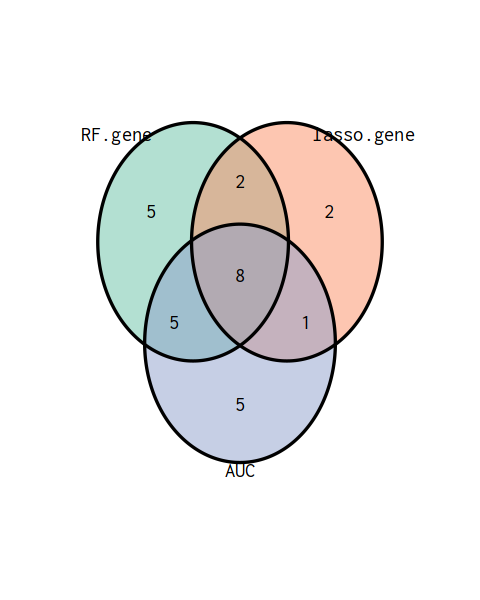

In [55]:
grid.draw(p)

In [45]:
pdf('./figure2/res2//venn.model.pdf',width = 6,height = 6)
grid.draw(p)
dev.off()

png 
  2

In [56]:
expr4 = expr3

In [57]:
expr4 = expr4[,c('Group',gene)]

In [58]:
#expr4 = expr4

In [59]:

library(plyr)
library(rms)#
library(epiDisplay)
varsU<-names(expr4[,2:dim(expr4)[2]])

Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   
  Result<-rbind(Result,result1[-1,])
}

Result
Uni_log<-data.frame(Result[,c(1,4:8)]) 
colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")
ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 
tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()
Uni_log[tzgene,]
tzgene
data = expr4[,c('Group',tzgene)]

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: Hmisc

Warning message:
"package 'Hmisc' was built under R version 4.2.3"

Attaching package: 'Hmisc'


The following objects are masked from 'package:plyr':

    is.discrete, summarize


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units


Loading required package: foreign

Warning message:
"package 'foreign' was built under R version 4.2.3"
Loading requi

,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
NPTX1,0.7022879,0.2846280,2.467389,0.0136102601,2.018365,1.197141,3.671283,NPTX1
FBXL2,1.5806065,0.4681866,3.376018,0.0007354314,4.857901,2.064878,12.912475,FBXL2
HIST1H4C,0.5258018,0.2151484,2.443903,0.0145293382,1.691815,1.132280,2.644698,HIST1H4C
PRSS3,1.0300869,0.3075524,3.349305,0.0008101443,2.801309,1.570769,5.282077,PRSS3
NELL1,0.7831184,0.2825692,2.771422,0.0055812045,2.188285,1.292864,3.940590,NELL1
ACOT7,0.8500260,0.3069820,2.768977,0.0056232648,2.339708,1.315154,4.406776,ACOT7
TUSC3,0.5653233,0.2458734,2.299245,0.0214910103,1.760017,1.103233,2.907154,TUSC3
TUBB4,0.4609513,0.2011675,2.291380,0.0219414314,1.585582,1.081927,2.391251,TUBB4


,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
NPTX1,0.7022879,0.0136102601,2.018365,1.197141,3.671283,NPTX1
FBXL2,1.5806065,0.0007354314,4.857901,2.064878,12.912475,FBXL2
HIST1H4C,0.5258018,0.0145293382,1.691815,1.132280,2.644698,HIST1H4C
PRSS3,1.0300869,0.0008101443,2.801309,1.570769,5.282077,PRSS3
NELL1,0.7831184,0.0055812045,2.188285,1.292864,3.940590,NELL1
ACOT7,0.8500260,0.0056232648,2.339708,1.315154,4.406776,ACOT7
TUSC3,0.5653233,0.0214910103,1.760017,1.103233,2.907154,TUSC3
TUBB4,0.4609513,0.0219414314,1.585582,1.081927,2.391251,TUBB4


[1] "NPTX1"    "FBXL2"    "HIST1H4C" "PRSS3"    "NELL1"    "ACOT7"    "TUSC3"   
[8] "TUBB4"

In [60]:
write.csv(Uni_log,file = './figure2/res2/cox.res.csv',quote = F)

In [61]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

formatFit<-function(fit){
  p<-summary(fit)$coefficients[,4]
  wald<-summary(fit)$coefficients[,3]^2
  valueB<-coef(fit)
  valueOR<-exp(coef(fit))
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5182  -0.8887  -0.5714   1.1290   2.5183  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -21.60774    4.98985  -4.330 1.49e-05 ***
NPTX1        -0.04926    0.49271  -0.100   0.9204    
FBXL2         0.32660    0.70016   0.466   0.6409    
HIST1H4C      0.67544    0.27375   2.467   0.0136 *  
PRSS3         0.92195    0.43290   2.130   0.0332 *  
NELL1         0.02547    0.64362   0.040   0.9684    
ACOT7        -0.34131    0.75511  -0.452   0.6513    
TUSC3         0.62187    0.66473   0.936   0.3495    
TUBB4         0.26863    0.31170   0.862   0.3888    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 236.99  on 189  degrees of freedom
Residual deviance: 209.80  on 181  degrees of freedom
AIC: 227.8

Number of Fisher Sc

Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-21.608,18.752,0(0~0),<0.001
NPTX1,-0.049,0.010,0.952(0.36~2.508),0.920
FBXL2,0.327,0.218,1.386(0.364~5.672),0.641
HIST1H4C,0.675,6.088,1.965(1.185~3.481),0.014
PRSS3,0.922,4.536,2.514(1.099~6.054),0.033
NELL1,0.025,0.002,1.026(0.285~3.578),0.968
ACOT7,-0.341,0.204,0.711(0.163~3.182),0.651
TUSC3,0.622,0.875,1.862(0.509~7.002),0.350
TUBB4,0.269,0.743,1.308(0.712~2.436),0.389


In [62]:
fit.reduce<-glm(Group~. ,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5182  -0.8887  -0.5714   1.1290   2.5183  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -21.60774    4.98985  -4.330 1.49e-05 ***
NPTX1        -0.04926    0.49271  -0.100   0.9204    
FBXL2         0.32660    0.70016   0.466   0.6409    
HIST1H4C      0.67544    0.27375   2.467   0.0136 *  
PRSS3         0.92195    0.43290   2.130   0.0332 *  
NELL1         0.02547    0.64362   0.040   0.9684    
ACOT7        -0.34131    0.75511  -0.452   0.6513    
TUSC3         0.62187    0.66473   0.936   0.3495    
TUBB4         0.26863    0.31170   0.862   0.3888    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 236.99  on 189  degrees of freedom
Residual deviance: 209.80  on 181  degrees of freedom
AIC: 227.8

Number of Fisher Sc

In [63]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=227.8
Group ~ NPTX1 + FBXL2 + HIST1H4C + PRSS3 + NELL1 + ACOT7 + TUSC3 + 
    TUBB4

           Df Deviance    AIC
- NELL1     1   209.80 225.80
- NPTX1     1   209.81 225.81
- ACOT7     1   210.00 226.00
- FBXL2     1   210.02 226.02
- TUBB4     1   210.55 226.55
- TUSC3     1   210.68 226.68
<none>          209.80 227.80
- PRSS3     1   214.59 230.59
- HIST1H4C  1   216.90 232.90

Step:  AIC=225.8
Group ~ NPTX1 + FBXL2 + HIST1H4C + PRSS3 + ACOT7 + TUSC3 + TUBB4

           Df Deviance    AIC
- NPTX1     1   209.81 223.81
- ACOT7     1   210.01 224.01
- FBXL2     1   210.05 224.05
- TUBB4     1   210.76 224.76
- TUSC3     1   210.98 224.98
<none>          209.80 225.80
+ NELL1     1   209.80 227.80
- PRSS3     1   214.81 228.81
- HIST1H4C  1   217.19 231.19

Step:  AIC=223.81
Group ~ FBXL2 + HIST1H4C + PRSS3 + ACOT7 + TUSC3 + TUBB4

           Df Deviance    AIC
- ACOT7     1   210.06 222.06
- FBXL2     1   210.06 222.06
- TUBB4     1   210.79 222.79
- TUSC3     1   210.98


Call:
glm(formula = Group ~ HIST1H4C + PRSS3 + TUSC3, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5582  -0.8646  -0.5985   1.1289   2.6821  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -19.9236     4.4130  -4.515 6.34e-06 ***
HIST1H4C      0.6843     0.2401   2.851  0.00436 ** 
PRSS3         1.0060     0.3136   3.207  0.00134 ** 
TUSC3         0.6300     0.2718   2.318  0.02047 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 236.99  on 189  degrees of freedom
Residual deviance: 211.28  on 186  degrees of freedom
AIC: 219.28

Number of Fisher Scoring iterations: 4


In [64]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  p<-summary(fit)$coefficients[,4]
  wald<-summary(fit)$coefficients[,3]^2
  valueB<-coef(fit)
  valueOR<-exp(coef(fit))
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

In [65]:
glm_res = formatFit(logit.step)

Waiting for profiling to be done...



In [66]:
write.csv(glm_res,file = './figure2/res2/glm.res.csv')

In [67]:
b = rownames(formatFit(logit.step))[2:length(rownames(formatFit(logit.step)))]

Waiting for profiling to be done...

Waiting for profiling to be done...



In [68]:
#save(b,file = 'b.rda')

In [80]:
a

[1] "SYT5"     "PRSS3"    "FBXL2"    "SYP"      "PTPRN"    "PTMS"    
 [7] "NELL1"    "HPCA"     "ACOT7"    "ATP1A3"   "NPTX1"    "HIST1H4C"
[13] "LY6H"     "CALM3"    "TUSC3"    "TUBB4"    "DYNC1I1"  "GABRD"   
[19] "ENO2"

In [69]:
b

[1] "HIST1H4C" "PRSS3"    "TUSC3"

In [70]:
data = data[,c('Group',b)]

In [71]:
library(autoReg)


Attaching package: 'autoReg'


The following object is masked from 'package:MASS':

    select




In [72]:
overall.log =  glm(Group~.,data=data,family=binomial())
model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

In [73]:
model3

name,desc,0 (N=130),1 (N=60),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
HIST1H4C,Mean <U+00B1> SD,8.7 <U+00B1> 0.9,9.0 <U+00B1> 0.7,HIST1H4C,"1.69 (1.11-2.58, p=.015)","1.98 (1.24-3.17, p=.004)"
PRSS3,Mean <U+00B1> SD,7.7 <U+00B1> 0.6,8.1 <U+00B1> 0.6,PRSS3,"2.80 (1.53-5.12, p<.001)","2.73 (1.48-5.06, p=.001)"
TUSC3,Mean <U+00B1> SD,8.0 <U+00B1> 0.7,8.3 <U+00B1> 0.7,TUSC3,"1.76 (1.09-2.85, p=.021)","1.88 (1.10-3.20, p=.021)"


In [74]:
write.csv(model3,file  = './figure2/res2/model3.csv')

In [75]:
options(repr.plot.width = 8)

In [83]:
p  = modelPlot(overall.log,change.pointsize = T)

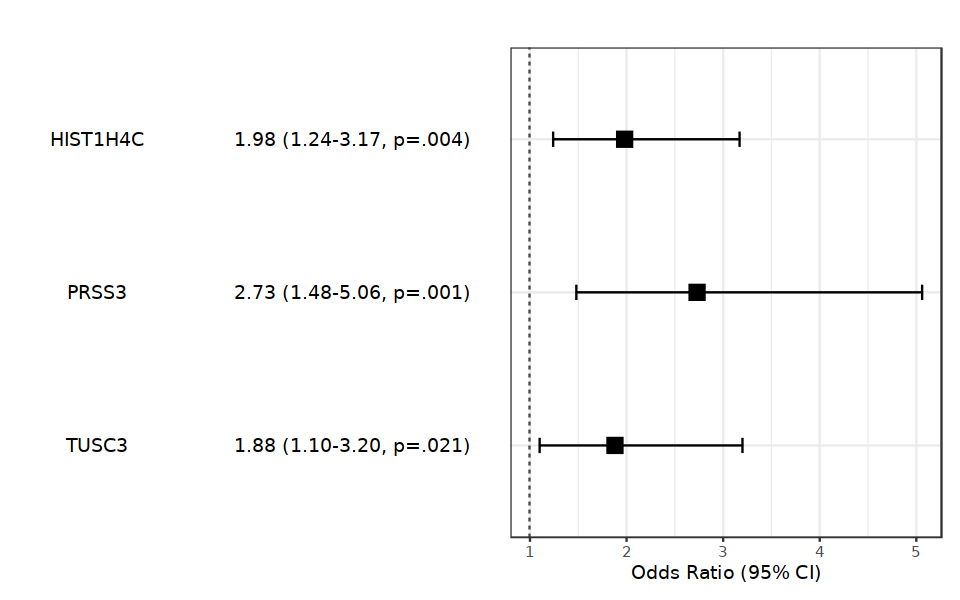

In [84]:
p

In [85]:
pdf('./figure2/res2/fig6.forest.pdf',width = 7,height = 4)
p
dev.off()

png 
  2

In [86]:
model3

name,desc,0 (N=130),1 (N=60),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
HIST1H4C,Mean <U+00B1> SD,8.7 <U+00B1> 0.9,9.0 <U+00B1> 0.7,HIST1H4C,"1.69 (1.11-2.58, p=.015)","1.98 (1.24-3.17, p=.004)"
PRSS3,Mean <U+00B1> SD,7.7 <U+00B1> 0.6,8.1 <U+00B1> 0.6,PRSS3,"2.80 (1.53-5.12, p<.001)","2.73 (1.48-5.06, p=.001)"
TUSC3,Mean <U+00B1> SD,8.0 <U+00B1> 0.7,8.3 <U+00B1> 0.7,TUSC3,"1.76 (1.09-2.85, p=.021)","1.88 (1.10-3.20, p=.021)"


In [84]:
library(ROCR)
dd<-datadist(data)  
options(datadist="dd")
data$Group = as.factor(data$Group)
fit1 <- lrm(Group~. , data=data,x=T,y=T)
save(fit1,data,file = 'train.fit1.rda')

In [71]:
library(caret)

In [72]:
set.seed(141)
folds <-createMultiFolds(y=data$Group,k=5,times=5)
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=test)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(test[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.7208958

In [73]:
auc_value

[1] 0.7750000 0.7272727 0.6753623 0.6369231 0.7946128 0.7285714 0.6538462
 [8] 0.8646154 0.6726190 0.6801347

In [74]:
num <- which.max(auc_value)
print(num)

fold_test <- data[folds[[num]],]   
fold_train <- data[-folds[[num]],]

fold_pre <- glm(Group~.,data=fold_train,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=fold_test)

options(repr.plot.width = 6)

[1] 8


In [75]:
data$Group = factor(data$Group,levels = c(0,1))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



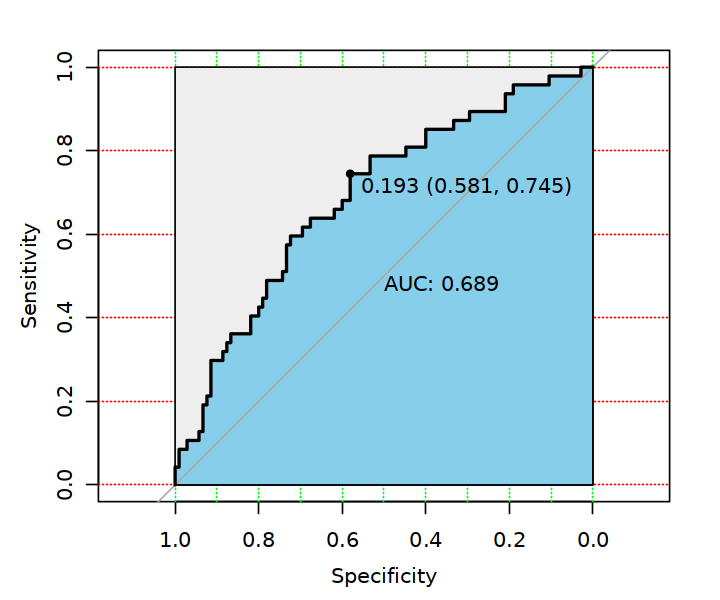

In [76]:
roc_curve <- pROC::roc(as.numeric(fold_test$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [78]:
library(rms)
dd <- datadist(train)
options(datadist="dd")
fit1 <- lrm(Group ~.,
            data = train,x=T,y=T)
cal1 <- calibrate(fit1, method='boot', B=100)

In [79]:
pdf('./figure2/res3//fig4.qc1.pdf',width = 5,height = 5)
plot(cal1,
     xlim = c(0,1),
     xlab = "Predicted Probability",
     ylab = "Observed Probability",
     legend = FALSE,
     subtitles = FALSE)
abline(0,1,col = "black",lty = 2,lwd = 2)
lines(cal1[,c("predy","calibrated.orig")], type = "l",lwd = 2,col="red",pch =16)
lines(cal1[,c("predy","calibrated.corrected")], type = "l",lwd = 2,col="green",pch =16)
legend(0.55,0.35,
       c("Apparent","Ideal","Bias-corrected"),
       lty = c(2,1,1),
       lwd = c(2,1,1),
       col = c("black","red","green"),
       bty = "n") 
dev.off()


n=152   Mean absolute error=0.034   Mean squared error=0.00193
0.9 Quantile of absolute error=0.068



png 
  2

In [80]:
library(rmda)
library(ggDCA)
library(ggplot2)
library(rms)
library(caret)

In [81]:
data$Group = y

In [82]:
head(data,2)

,Group,HIST1H4C,PRSS3,TUSC3
,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431721,0,8.043072,7.752138,8.290631
GSM2431726,0,9.214012,7.969423,6.774439


In [83]:
set.seed(123)
HIST1H4C.model <- decision_curve(Group ~ HIST1H4C, data = data,
    thresholds = seq(0, 0.8, by = 0.005), bootstraps = 10)
PRSS3.model <- decision_curve(Group ~ PRSS3, data = data,
    thresholds = seq(0, 0.8, by = 0.005), bootstraps = 10)
TUSC3.model <- decision_curve(Group ~ TUSC3, data = data,
    thresholds = seq(0, 0.8, by = 0.005), bootstraps = 10)


full.model <- decision_curve(Group~HIST1H4C +PRSS3 +TUSC3 ,
                             data = data,
                             thresholds = seq(0, 0.8, by = .005),
                             bootstraps = 10)

Note:  The data provided is used to both fit a prediction model and to estimate the respective decision curve. This may cause bias in decision curve estimates leading to over-confidence in model performance. 



In [84]:
pdf('./figure2/res3/fig4.qc2.pdf',width = 5,height = 5)
plot_decision_curve( list(HIST1H4C.model,PRSS3.model,TUSC3.model,full.model),
                    curve.names = c('HIST1H4C.model','PRSS3.model','TUSC3.model',
                                    'full.model'),
                    col = ggsci::pal_npg("nrc")(5),
                    confidence.intervals = FALSE,  #remove confidence intervals
                    cost.benefit.axis = FALSE, #remove cost benefit axis
                    legend.position = "topright") #add the legend
dev.off()

Note: When multiple decision curves are plotted, decision curves for 'All' are calculated using the prevalence from the first DecisionCurve object in the list provided.



png 
  2

In [85]:
fold_pre <- glm(Group~.,data=fold_test,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)

In [86]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following object is masked from 'package:epiDisplay':

    ci


The following objects are masked from 'package:stats':

    cov, smooth, var




In [87]:
colnames(data)

[1] "Group"    "HIST1H4C" "PRSS3"    "TUSC3"

In [88]:
options(repr.plot.width = 6,repr.plot.height = 6)

In [89]:
pdf('./figure2/res3/fig5.train.roc.pdf',width = 6,height = 6)
rocobj1 <- plot.roc(data$Group, data$HIST1H4C,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$Group, data$PRSS3,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$TUSC3,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
legend("topleft", legend=c(paste0("HIST1H4C ", round(rocobj1$auc/100,digits = 2)),
                               paste0("PRSS3 ", round(rocobj2$auc/100,digits = 2)),
                               paste0("TUSC3 ", round(rocobj3$auc/100,digits = 2)),
                               paste0("model_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70"), lwd=1)
dev.off()

png 
  2

In [91]:
require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

In [92]:
table(data$Group)


  0   1 
130  60 

In [93]:
data1 = data
data1$Group = ifelse(data1$Group == 1,'MDD','Con')

In [94]:
mydata<-data1 %>% 
  gather(key="gene",value="Expression",HIST1H4C:TUSC3) %>% 
  dplyr::select(Group,gene,Expression) 

In [97]:
compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene")
p <- ggboxplot(mydata, x = "Group", y = "Expression",
          color = "Group", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "Group", palette = "jco",
          add = "jitter")

gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
HIST1H4C,Expression,Con,MDD,0.0052800639,0.0110,0.00528,**,T-test
PRSS3,Expression,Con,MDD,0.0006069469,0.0018,0.00061,***,T-test
TUSC3,Expression,Con,MDD,0.0238766451,0.0240,0.02388,*,T-test


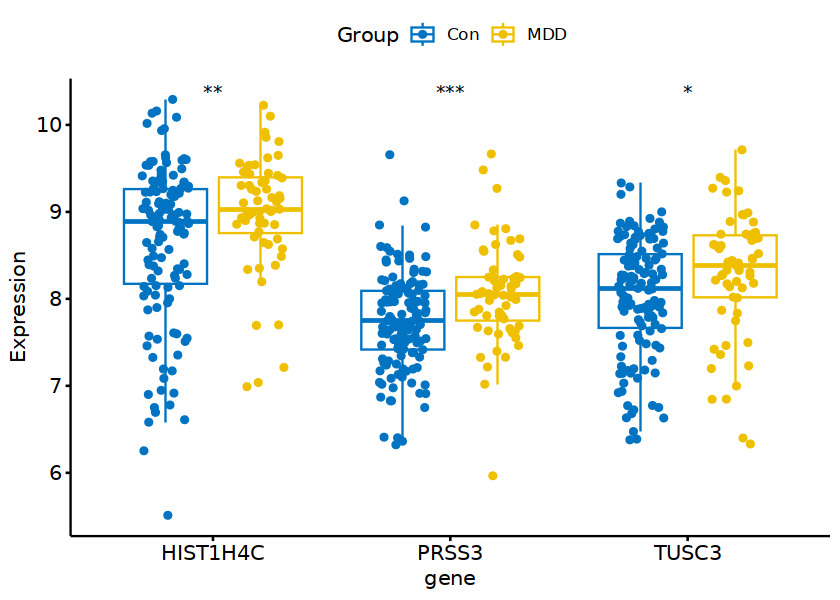

In [98]:
diffgene = as.data.frame(compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene"))
diffgene = rownames(diffgene) = diffgene[,1]
options(repr.plot.height = 5,repr.plot.width = 21)
options(repr.plot.width = 7,repr.plot.height = 5)
p + stat_compare_means(aes(group = Group), label = "p.signif",method = 't.test')

In [99]:
ggsave('./figure2/res3/fig6.boxplot.pdf',width = 6,height = 4)

In [100]:
colnames(data)

[1] "Group"    "HIST1H4C" "PRSS3"    "TUSC3"

In [101]:
tend1 = data1[,c( 2:4)] 
gene_cor <- cor(tend1, method = 'pearson')
diag(gene_cor) <- 0
gene_cor <- reshape2::melt(gene_cor)
gene_cor <- subset(gene_cor, value != 0) 
head(gene_cor)

library(circlize)
pdf('./figure2/res3/fig7.cor.circle.pdf',height = 6,width = 6)
p= chordDiagram(gene_cor, 
    annotationTrack = c('grid', 'name', 'axis'), 
    grid.col = c(HIST1H4C = 'green3', PRSS3 = 'red', MARCKS = 'orange', TUSC3 = 'purple', SAP130 = 'skyblue'), 
    col = colorRamp2(c(-1, 0, 1), c('green', 'white', 'red'), transparency = 0.5), 
    annotationTrackHeight = c(0.05, 0.05),
)
dev.off()

,Var1,Var2,value
,<fct>,<fct>,<dbl>
2,PRSS3,HIST1H4C,0.009006129
3,TUSC3,HIST1H4C,-0.113066268
4,HIST1H4C,PRSS3,0.009006129
6,TUSC3,PRSS3,0.195535892
7,HIST1H4C,TUSC3,-0.113066268
8,PRSS3,TUSC3,0.195535892


circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




png 
  2